### Natural Language Proccessing Project - Detect ChatGPT

In [2]:
# Data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Utility libraries
from prettytable import PrettyTable
from collections import Counter
import re
import string

In [9]:
train_set = pd.read_csv('./data/competetion/train_essays.csv')
chatgpt_train = pd.read_csv('./data/gpt/daigt_external_dataset.csv')

In [4]:
# Edit these to match our theme (School grading)
colors = ['#FF92FF', '#E68FF2', '#CE8CE6', '#B58AD9', '#9C87CC', '#8484C0', '#6B81B3']

In [5]:
train_set.head(5)

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


### ChatGPT Dataset Description
#### id: unique identifier for each text.
#### text: extracted text from FeedBack Prize 3 competition. Can be used as student text.
#### instructions: the instruction for ChatGPT to generate the text.
#### source_text: AI generated text.

In [6]:
chatgpt_train.head(5)

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [7]:
train_set.shape

(1378, 4)

In [8]:
chatgpt_train.shape

(44868, 5)

In [23]:
train_set.isna().sum()

id           0
prompt_id    0
text         0
generated    0
dtype: int64

In [24]:
chatgpt_train.isna().sum()

id              0
text            0
instructions    0
source_text     0
dtype: int64

### To seperate student writings and chatgpt we remove the three generated, so this set is strictly handwritten student essays.

In [25]:
train_set['generated'].value_counts()

generated
0    1375
1       3
Name: count, dtype: int64

In [26]:
train_set.drop(train_set[train_set['generated'] == 1].index, inplace=True)

#### In our ChatGPT dataset we have both student and chat generation, here we will focus on the chatGPT generated text instead of handwritten student essays.

In [34]:
total_count = chatgpt_train['source_text'].count()
total_count # Total chat generated texts (given the specific instructions)

2421

### Structure of Dataset Prompts

Lidt rodet skal merge de 2 datasæt så hver prompt har en titel...

In [18]:
# Should be merged, this is only to see structure of data.
other_data = pd.read_csv('./data/all/train.csv')

# Filter rows where the source is "chat_gpt_moth", this is the same as "Daigt_external.csv"
filtered_data = other_data[other_data['source'] == 'chat_gpt_moth']

# Now see how many prompt titles this csv have
filtered_data_values = filtered_data['prompt_name'].value_counts()

filtered_data_values

prompt_name
Seeking multiple opinions                853
Distance learning                        830
Mandatory extracurricular activities     266
Summer projects                          169
Facial action coding system               82
Community service                         64
Cell phones at school                     49
"A Cowboy Who Rode the Waves"             47
Grades for extracurricular activities     23
Car-free cities                           12
Driverless cars                           11
Phones and driving                         8
Exploring Venus                            4
Does the electoral college work?           3
Name: count, dtype: int64

### Categories of Generated Data from ChatGPT (Based on Prompt):

<small>
1. Seeking multiple opinions<br>
2. Distance learning<br>
3. Mandatory extracurricular activities<br>
4. Summer projects<br>
5. Facial action coding system<br>
6. Community service<br>
7. Cell phones at school<br>
8. "A Cowboy Who Rode the Waves"<br>
9. Grades for extracurricular activities<br>
10. Car-free cities<br>
11. Driverless cars<br>
12. Phones and driving<br>
13. Exploring Venus<br>
14. Does the electoral college work?
</small>
    

### 5 most popular prompts

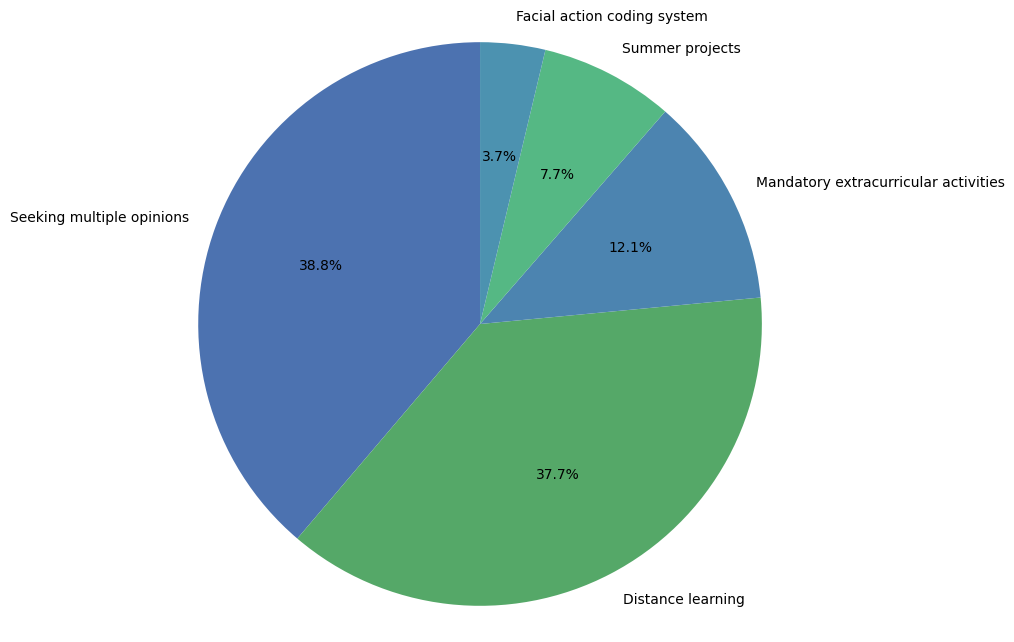

In [26]:
# Get the top 5 most popular prompts
top_5_prompts = filtered_data_values.head(5)

# Prepare data for the pie chart
labels = top_5_prompts.index
sizes = top_5_prompts.values

# Colors
colors = ['#4C72B0', '#55A868', '#4C84B0', '#55B884', '#4C92B0']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

/var/folders/1m/z394zjdj3sbg77n_9y47f6nr0000gn/T/ipykernel_42763/609414940.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prompt_titles_count.values, y=prompt_titles_count.index, palette=colors)
/var/folders/1m/z394zjdj3sbg77n_9y47f6nr0000gn/T/ipykernel_42763/609414940.py:4: UserWarning: 
The palette list has fewer values (5) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=prompt_titles_count.values, y=prompt_titles_count.index, palette=colors)


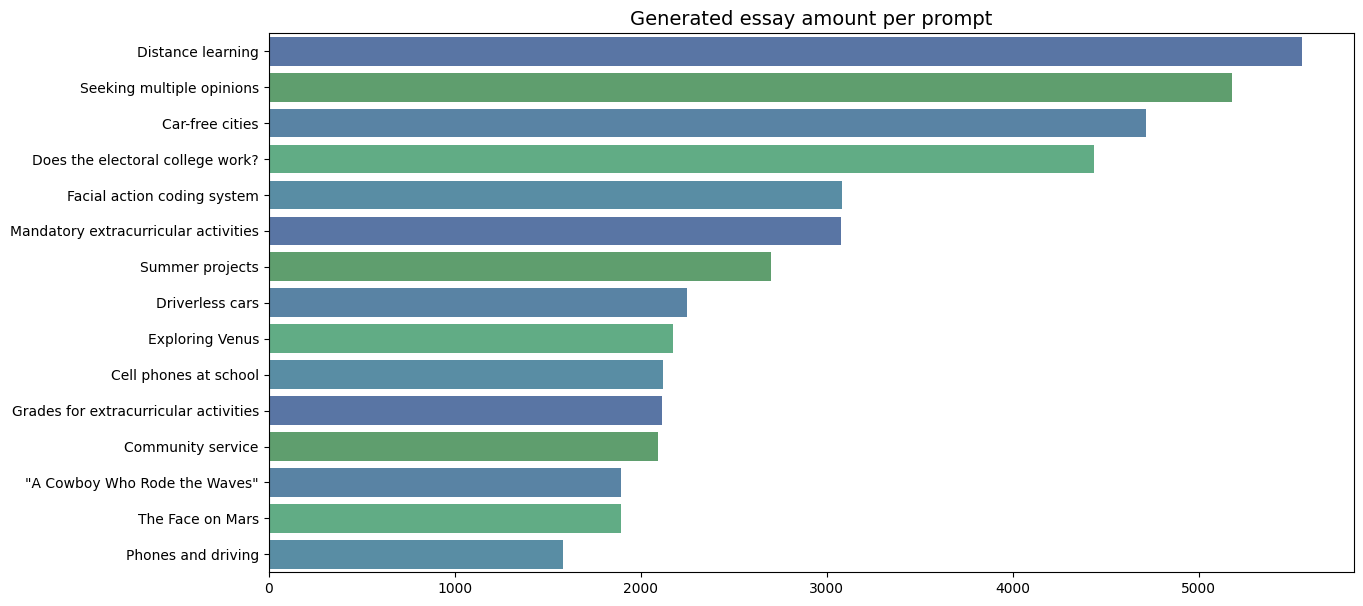

In [28]:
prompt_titles_count = other_data['prompt_name'].value_counts()

plt.figure(figsize=(14, 7))
sns.barplot(x=prompt_titles_count.values, y=prompt_titles_count.index, palette=colors)
plt.title('Generated essay amount per prompt', fontsize=14)
plt.ylabel('')
plt.show()

### Now using Daigt_External again, to compare text length of handwritten student essays and gpt generated
The below graphs give us insights about the distribution of the amount of characters, words and sentences.

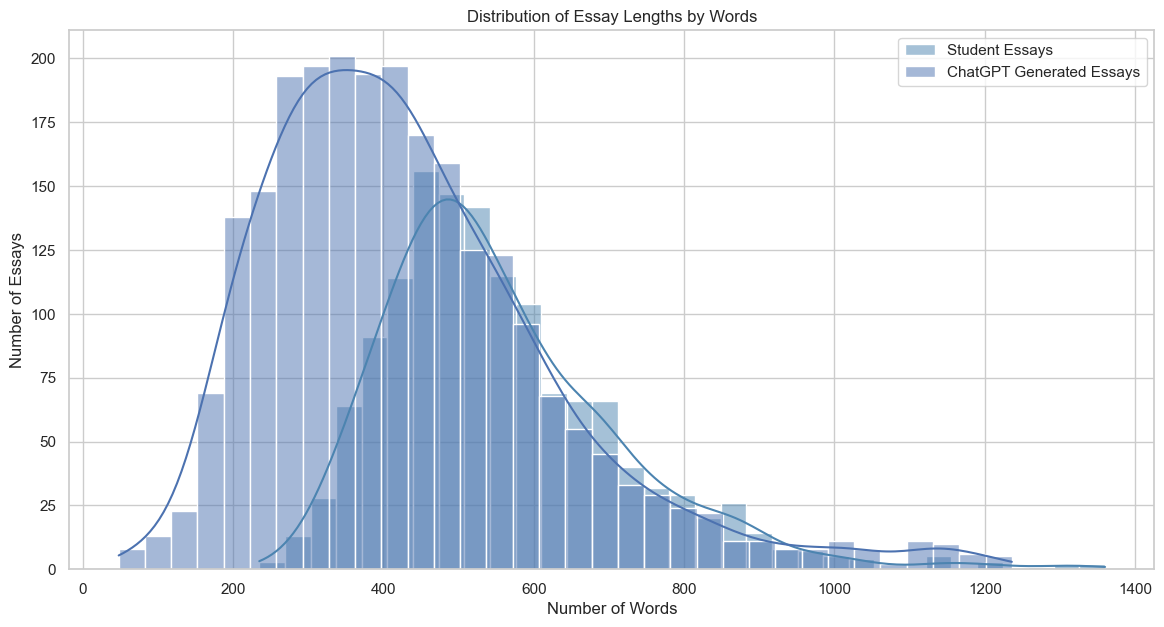

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

student_train_word_count = train_set['text'].apply(lambda x: len(x.split()))
gpt_train_word_count = chatgpt_train['text'].apply(lambda x: len(x.split()))

sns.histplot(student_train_word_count, color=colors[2], label='Student Essays', kde=True)
sns.histplot(gpt_train_word_count, color=colors[0], label='ChatGPT Generated Essays', kde=True)

plt.title('Distribution of Essay Lengths by Words')
plt.xlabel('Number of Words')
plt.ylabel('Number of Essays')
plt.legend()
plt.show()

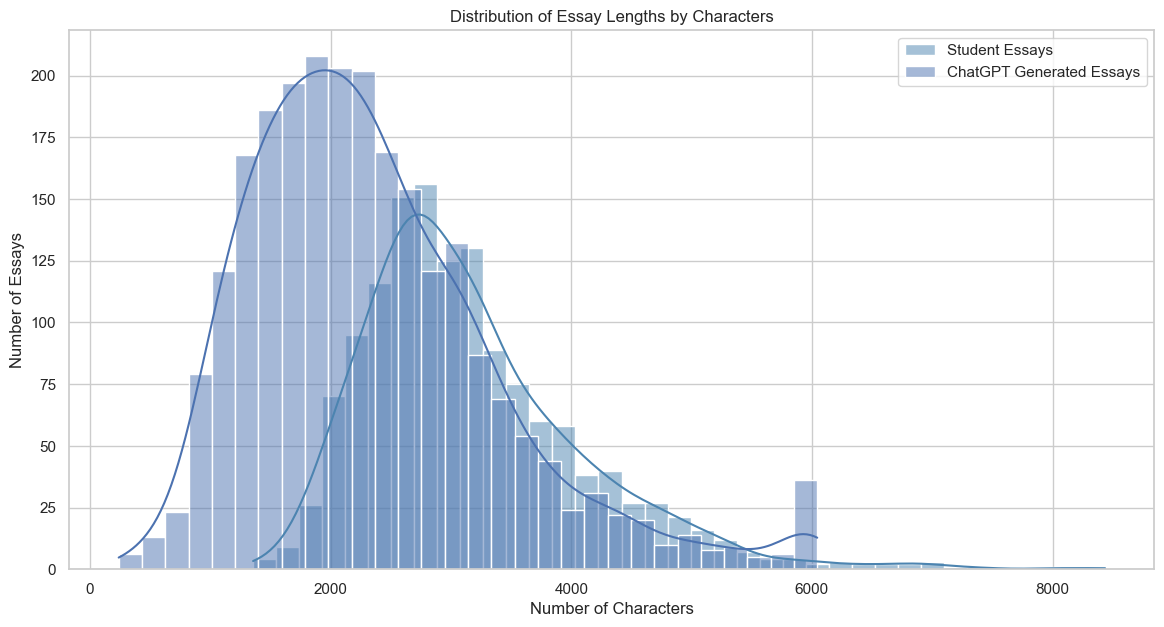

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

sns.histplot(train_set['text'].apply(len), color=colors[2], label='Student Essays', kde=True)
sns.histplot(chatgpt_train['text'].apply(len), color=colors[0], label='ChatGPT Generated Essays', kde=True)

plt.title('Distribution of Essay Lengths by Characters')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Essays')
plt.legend()
plt.show()

### Next, we'll calculate the average characters, words, and sentences per essay by tokenizing the text and using helper functions for processing.

In [105]:
# Helper functions
def annotate_bars(ax):
    """Annotate bars with their height values."""
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 10), 
                    textcoords='offset points',
                    ha='center', 
                    va='center')

def plot_annotated_bar(ax, data, label_mapping, title):
    """Plot a bar chart with annotated bars."""
    ax.bar(data.index.map(label_mapping), data, color=colors)
    ax.set_title(title, fontsize=14)
    annotate_bars(ax)

In [124]:
# Ensure necessary NLTK data is downloaded
# nltk.download('punkt')

# Calculate character, word, and sentence counts for each text
train_set['character_count'] = train_set['text'].str.len()
train_set['word_count'] = train_set['text'].apply(lambda x: len(word_tokenize(x)))
train_set['sentence_count'] = train_set['text'].apply(lambda x: len(sent_tokenize(x)))

# Compute average counts by prompt_id
average_counts = train_set.groupby('prompt_id').agg({
    'character_count': 'mean',
    'word_count': 'mean',
    'sentence_count': 'mean'
}).reset_index()

train_average_character_counts = average_counts[['prompt_id', 'character_count']]
train_average_word_counts = average_counts[['prompt_id', 'word_count']]
train_average_sentence_counts = average_counts[['prompt_id', 'sentence_count']]


### Here we use the filtered data again to get access to the titles so we can categorize based on them.

In [ ]:
# Calculate character, word, and sentence counts for each text
filtered_data['character_count'] = filtered_data['text'].str.len()
filtered_data['word_count'] = filtered_data['text'].apply(lambda x: len(word_tokenize(x)))
filtered_data['sentence_count'] = filtered_data['text'].apply(lambda x: len(sent_tokenize(x)))

# Compute average counts by prompt_name
average_counts = filtered_data.groupby('prompt_name').agg({
    'character_count': 'mean',
    'word_count': 'mean',
    'sentence_count': 'mean'
}).reset_index()

chatgpt_average_character_counts = average_counts[['prompt_name', 'character_count']]
chatgpt_average_word_counts = average_counts[['prompt_name', 'word_count']]
chatgpt_average_sentence_counts = average_counts[['prompt_name', 'sentence_count']]


In [100]:
average_values = pd.DataFrame({
    'Source': ['Student Train', 'ChatGPT Train'],
    'Avg Chars': [round(train_set['character_count'].mean(), 2), round(filtered_data['character_count'].mean(), 2)],
    'Avg Words': [round(train_set['word_count'].mean(), 2), round(filtered_data['word_count'].mean(), 2)],
    'Avg Sentences': [round(train_set['sentence_count'].mean(), 2), round(filtered_data['sentence_count'].mean(), 2)]
})

table = PrettyTable()
table.field_names = average_values.columns.tolist()

for _, row in average_values.iterrows():
    table.add_row(row.tolist())

table

Source,Avg Chars,Avg Words,Avg Sentences
Student Train,3169.05,621.79,27.63
ChatGPT Train,1248.88,224.54,9.53


### Summary for ChatGPT Generated

/var/folders/1m/z394zjdj3sbg77n_9y47f6nr0000gn/T/ipykernel_42763/881442769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='prompt_name', y='word_count', data=chatgpt_average_word_counts, palette=colors)
/var/folders/1m/z394zjdj3sbg77n_9y47f6nr0000gn/T/ipykernel_42763/881442769.py:2: UserWarning: 
The palette list has fewer values (5) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='prompt_name', y='word_count', data=chatgpt_average_word_counts, palette=colors)


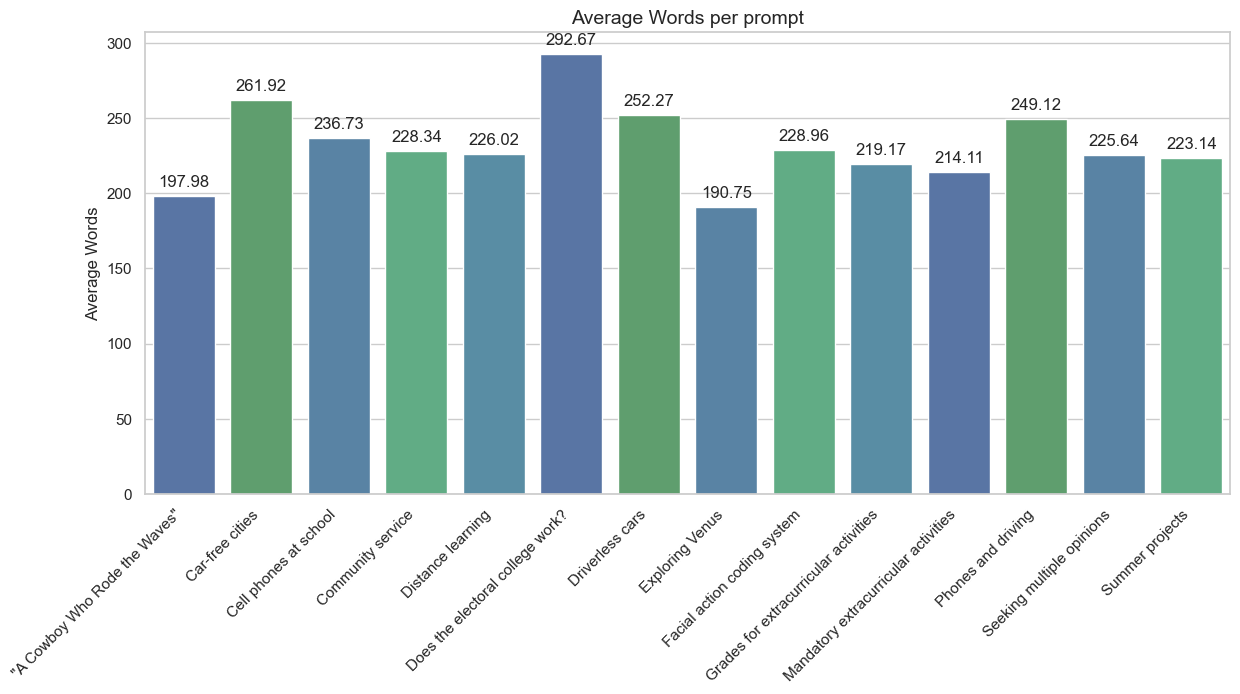

In [122]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='prompt_name', y='word_count', data=chatgpt_average_word_counts, palette=colors)
plt.title('Average Words per prompt', fontsize=14)
plt.xlabel('')
plt.ylabel('Average Words')
plt.xticks(rotation=45, ha='right')
annotate_bars(ax)
plt.show()

/var/folders/1m/z394zjdj3sbg77n_9y47f6nr0000gn/T/ipykernel_42763/2367616923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='prompt_name', y='character_count', data=chatgpt_average_character_counts, palette=colors)
/var/folders/1m/z394zjdj3sbg77n_9y47f6nr0000gn/T/ipykernel_42763/2367616923.py:2: UserWarning: 
The palette list has fewer values (5) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='prompt_name', y='character_count', data=chatgpt_average_character_counts, palette=colors)


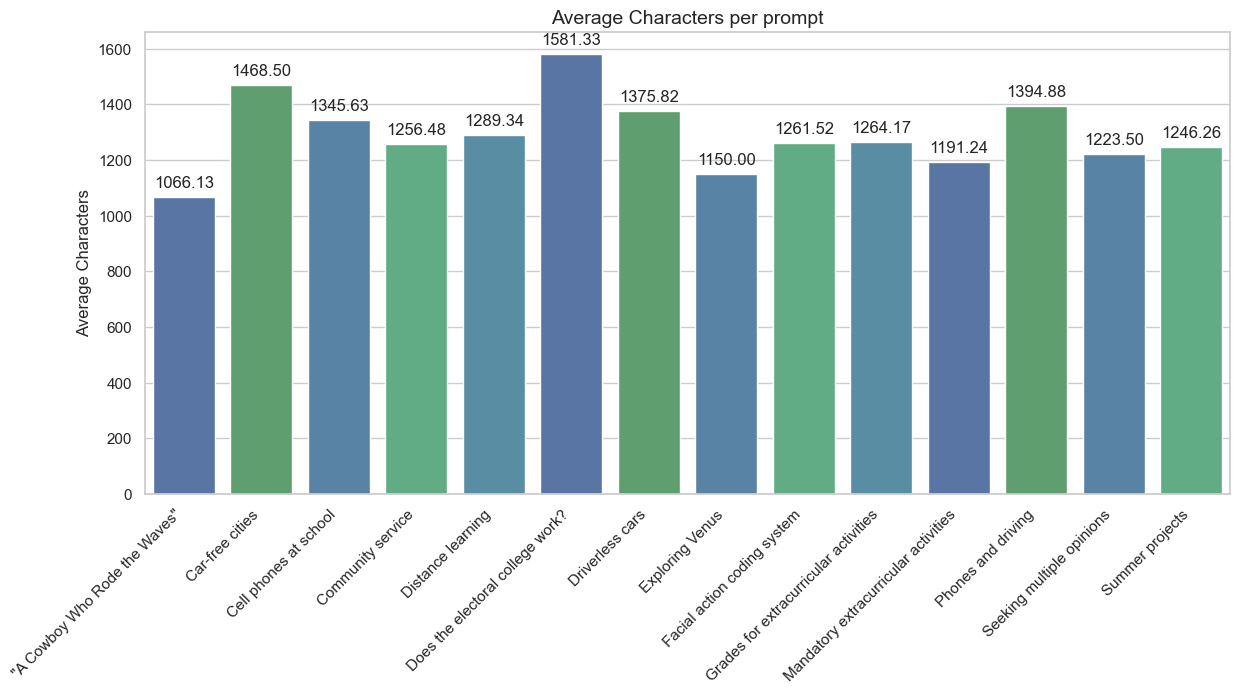

In [121]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='prompt_name', y='character_count', data=chatgpt_average_character_counts, palette=colors)
plt.title('Average Characters per prompt', fontsize=14)
plt.xlabel('')
plt.ylabel('Average Characters')
plt.xticks(rotation=45, ha='right')
annotate_bars(ax)
plt.show()

/var/folders/1m/z394zjdj3sbg77n_9y47f6nr0000gn/T/ipykernel_42763/2366341034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='prompt_name', y='sentence_count', data=chatgpt_average_sentence_counts, palette=colors)
/var/folders/1m/z394zjdj3sbg77n_9y47f6nr0000gn/T/ipykernel_42763/2366341034.py:2: UserWarning: 
The palette list has fewer values (5) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='prompt_name', y='sentence_count', data=chatgpt_average_sentence_counts, palette=colors)


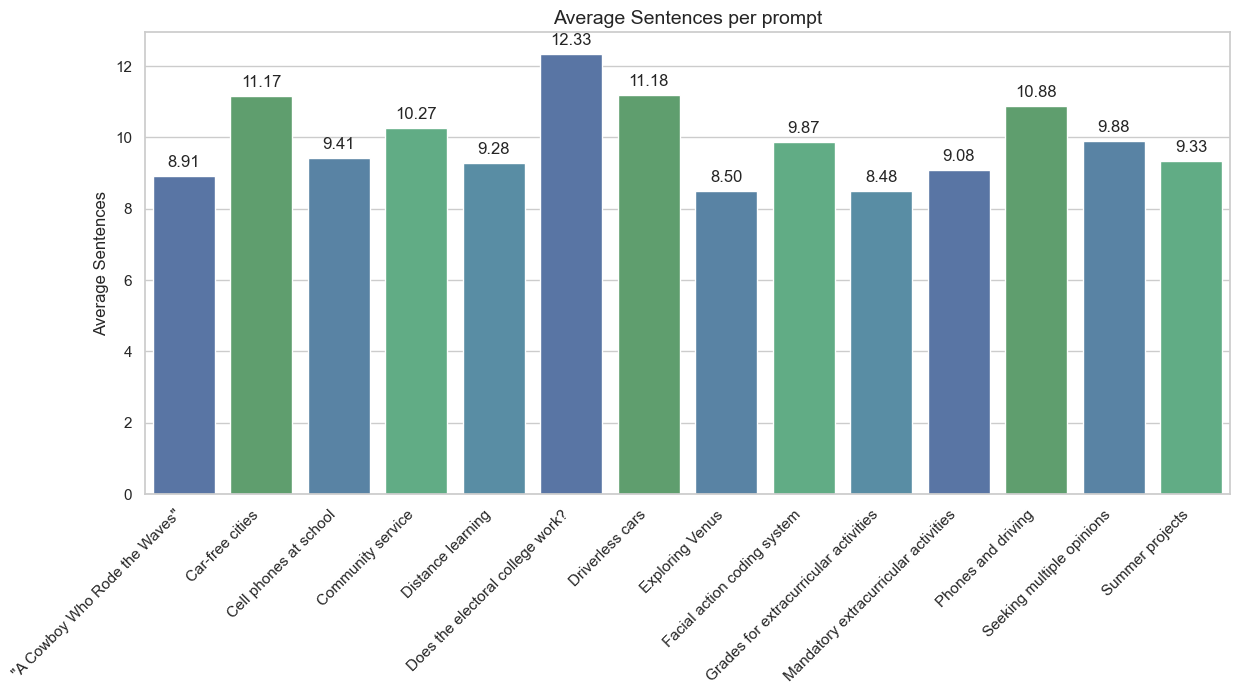

In [123]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='prompt_name', y='sentence_count', data=chatgpt_average_sentence_counts, palette=colors)
plt.title('Average Sentences per prompt', fontsize=14)
plt.xlabel('')
plt.ylabel('Average Sentences')
plt.xticks(rotation=45, ha='right')
annotate_bars(ax)
plt.show()

### For our student data set we only have 2 prompts, (If we use persuade we will have alot)

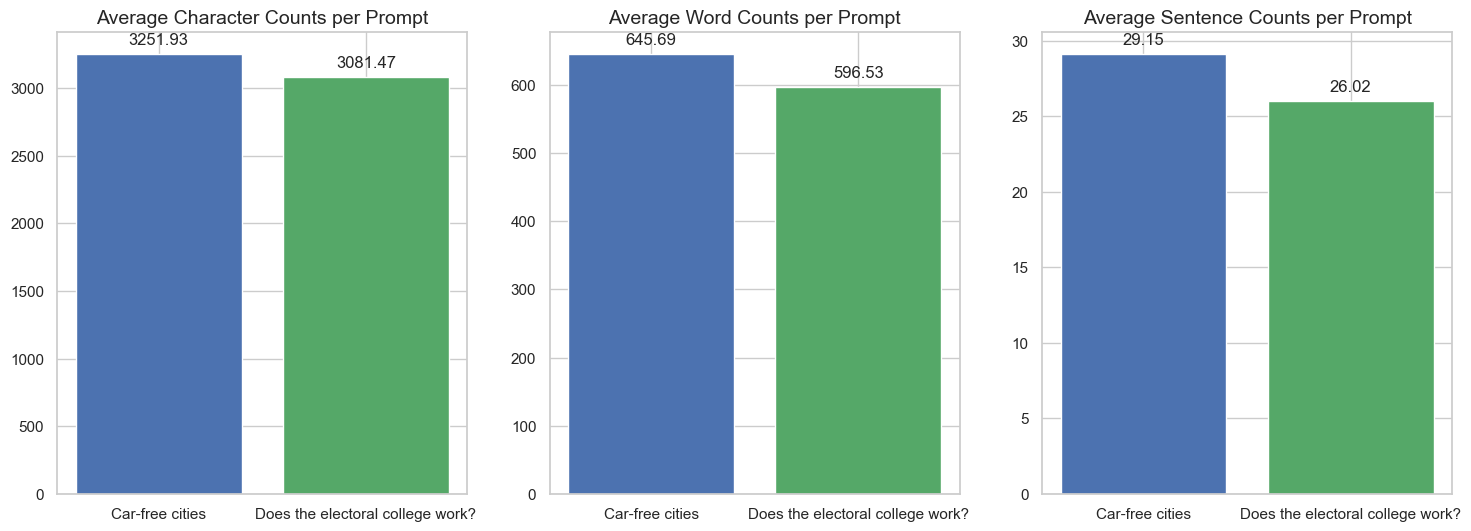

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
prompts = {0: 'Car-free cities', 1: 'Does the electoral college work?'}

plot_annotated_bar(axes[0], train_average_character_counts['character_count'], prompts, 'Average Character Counts per Prompt')
plot_annotated_bar(axes[1], train_average_word_counts['word_count'], prompts, 'Average Word Counts per Prompt')
plot_annotated_bar(axes[2], train_average_sentence_counts['sentence_count'], prompts, 'Average Sentence Counts per Prompt')

plt.show()

### Unique Words

In [146]:
train_unique_words = set(train_set['text'].str.split().explode())
chatgpt_train_unique_words = set(filtered_data['text'].str.split().explode())

table = PrettyTable(['Dataset', 'Amount of Unique Words'])
table.add_row(['Student Essays', len(train_unique_words)])
table.add_row(['ChatGPT Generated Essays', len(chatgpt_train_unique_words)])

table

Dataset,Amount of Unique Words
Student Essays,29540
ChatGPT Generated Essays,20206


### Common Words Analysis
Next, we will compare the 20 most frequently used words in both types of essays.

In [139]:
def most_frequent_words(data, n=20):
    vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
    word_matrix = vectorizer.fit_transform(data['text'])
    word_freq = pd.DataFrame(word_matrix.sum(axis=0), columns=vectorizer.get_feature_names_out())
    common_words = word_freq.transpose().sort_values(by=0, ascending=False).head(n)
    return common_words

/var/folders/1m/z394zjdj3sbg77n_9y47f6nr0000gn/T/ipykernel_42763/2413818139.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_common_words[0], y=train_common_words.index, palette=colors)
/var/folders/1m/z394zjdj3sbg77n_9y47f6nr0000gn/T/ipykernel_42763/2413818139.py:7: UserWarning: 
The palette list has fewer values (5) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=train_common_words[0], y=train_common_words.index, palette=colors)
/var/folders/1m/z394zjdj3sbg77n_9y47f6nr0000gn/T/ipykernel_42763/2413818139.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chatgpt_train_common_words[0], y=chatgpt_train_common_words.index, palette=co

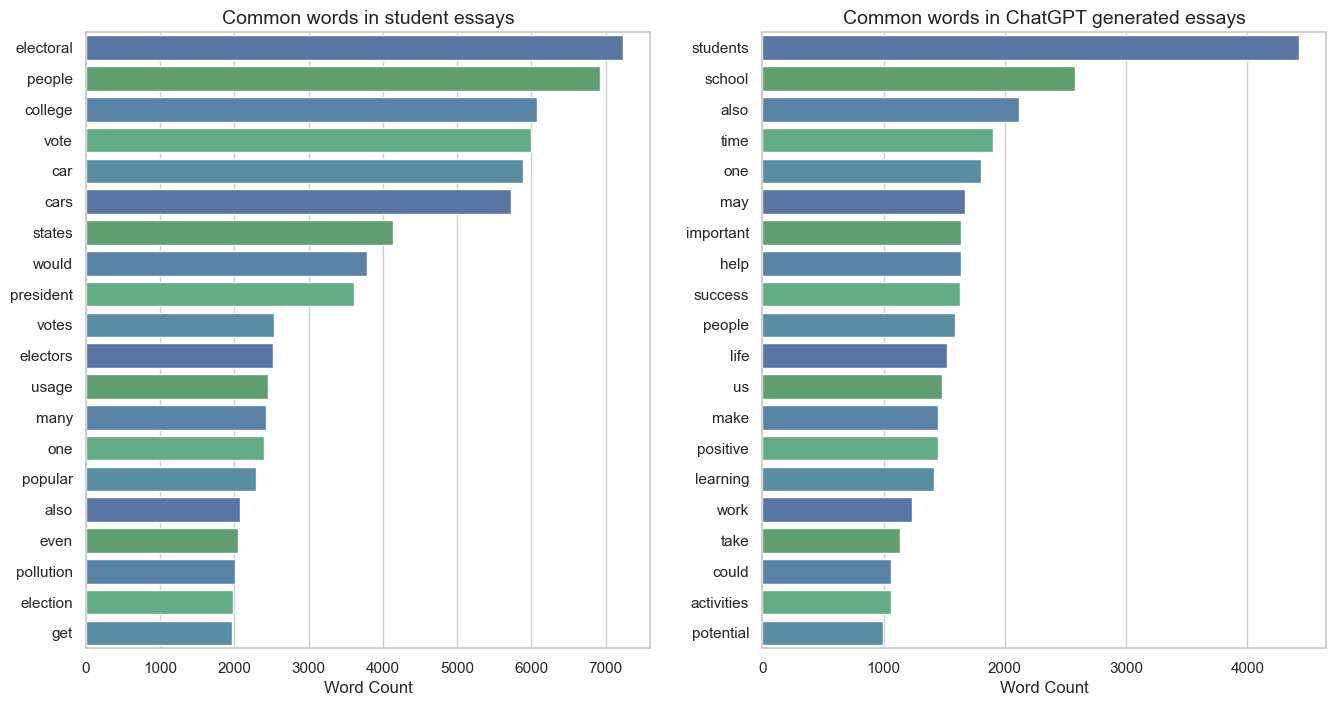

In [140]:
train_common_words = most_frequent_words(train_set)
chatgpt_train_common_words = most_frequent_words(filtered_data)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.barplot(x=train_common_words[0], y=train_common_words.index, palette=colors)
plt.title('Common words in student essays', fontsize=14)
plt.xlabel('Word Count')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.barplot(x=chatgpt_train_common_words[0], y=chatgpt_train_common_words.index, palette=colors)
plt.title('Common words in ChatGPT generated essays', fontsize=14)
plt.xlabel('Word Count')
plt.ylabel('')

plt.show()

### Special Characters
We'll examine special characters to understand the noise in handwritten vs. ChatGPT generated essays.

In [141]:
def generate_special_characters_table(df, text_column='text'):
    special_characters = [c for text in df[text_column] for c in text 
                          if not (c.isalnum() or c.isspace())]
    character_counts = Counter(special_characters)
    table = PrettyTable(['Special Character', 'Count'])

    for char, count in character_counts.items():
        table.add_row([char, count])

    table.sortby = 'Count'
    table.reversesort = True

    return table

In [145]:
generate_special_characters_table(train_set)

Special Character,Count
.,39998
",",33117
"""",10519
',7120
?,1452
:,722
!,494
%,387
&,17
_,16


In [144]:
generate_special_characters_table(filtered_data)

Special Character,Count
",",26342
.,23199
-,3175
',1883
’,1051
"""",343
;,282
“,203
”,202
:,199


# Note til hvad som skal laves inden test af forskellige modeller

Merge de 2 sets, og generér mere gennem ChatGPT api

Data Cleaning, massere af det

Initial Testing: Start med et lille datasæt for at observere effekterne af at tilføje mere data, og derved undgå at introducere støjende udsving i analysen.